## Plant Disease Detection and Segmentation – Demo Notebook

This notebook serves as a complete demonstration pipeline for detecting plant diseases from leaf images. It integrates both **classification** and **segmentation** models to provide insightful predictions.

### What’s Included

- **Classification Model**  
  A trained DenseNet121-based model (`best_classification_model.h5`) used to predict the disease class (or "healthy") for a given leaf image.

- **Segmentation Model**  
  A semantic segmentation model (`best_segmentation_model.h5`) that highlights the infected regions on the leaf surface.

- **Class Mapping File**  
  A `class_mapping.json` file that maps predicted class indices to human-readable labels.

### Functionality

- Load pre-trained models and class mappings.
- Perform disease classification with confidence scores.
- Generate segmentation masks for visual localization of infected areas.
- Display combined results in an intuitive format.

> This notebook acts as a real-world simulation of how such a system could be used by farmers, agronomists, or researchers for fast and visual disease assessment.


### Loading necessary libraries

In [ ]:
import numpy as np
import cv2
import json
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

### Loading models and class mappings

In [ ]:
classification_model = load_model('/content/best_classification_model.h5')

segmentation_model = load_model('/content/best_segmentation_model.h5', compile=False)

with open('/content/class_mappings.json', 'r') as f:
    class_mapping = json.load(f)

label_mapping = {int(k): v for k, v in class_mapping['label_mapping'].items()}

### Generating Predictions

In [ ]:
def preprocess_image(image_path, target_size=(224, 224)):
    '''
    Preprocesses the input image by resizing and normalizing.
    '''
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0

    return np.expand_dims(image, axis=0)

In [ ]:
def predict_class(image_path):
    '''
    Predicts the class of the input image.
    '''
    image = preprocess_image(image_path)
    predictions = classification_model.predict(image)

    predicted_class_idx = np.argmax(predictions, axis=1)[0]
    class_name = label_mapping[predicted_class_idx]
    confidence = predictions[0][predicted_class_idx]

    return class_name, confidence

In [ ]:
def predict_segmentation_mask(image_path):
    '''
    Predicts a segmentation mask for the input image.
    '''
    image = preprocess_image(image_path)
    pred_mask = segmentation_model.predict(image)[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8)

    return pred_mask

In [ ]:
def display_results(image_path):
    '''
    Displays the original image, predicted class, and segmentation mask.
    '''
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    class_name, confidence = predict_class(image_path)
    mask = predict_segmentation_mask(image_path)

    # Plotting results:

    plt.figure(figsize=(15,6))

    plt.subplot(1,3,1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title(f'Predicted Class:\n{class_name} ({confidence*100:.2f}%)')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title('Segmentation Mask')
    plt.imshow(mask[:,:,0], cmap='gray')
    plt.axis('off')

    plt.show()

### Examples:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


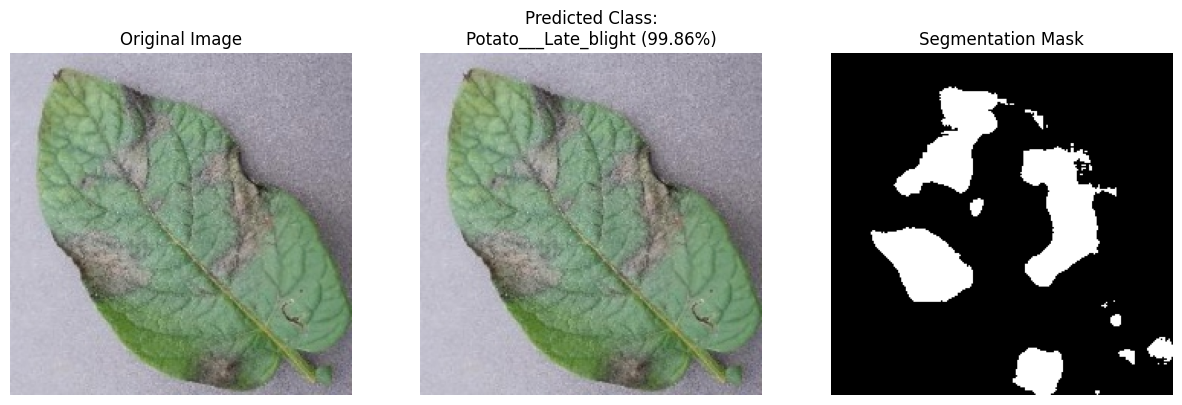

In [ ]:
image_1_path = '/content/test_image_3.jpg'
display_results(image_1_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


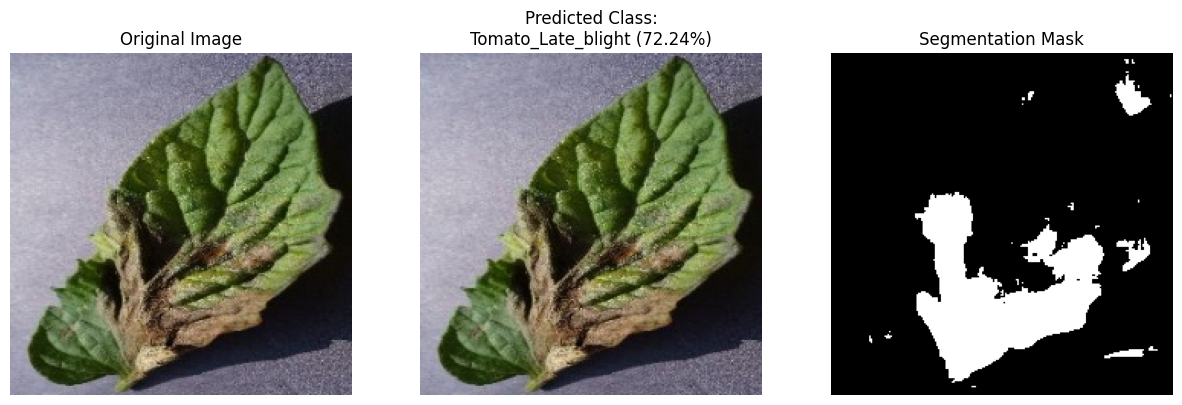

In [ ]:
image_2_path = '/content/test_image_26.jpg'
display_results(image_2_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


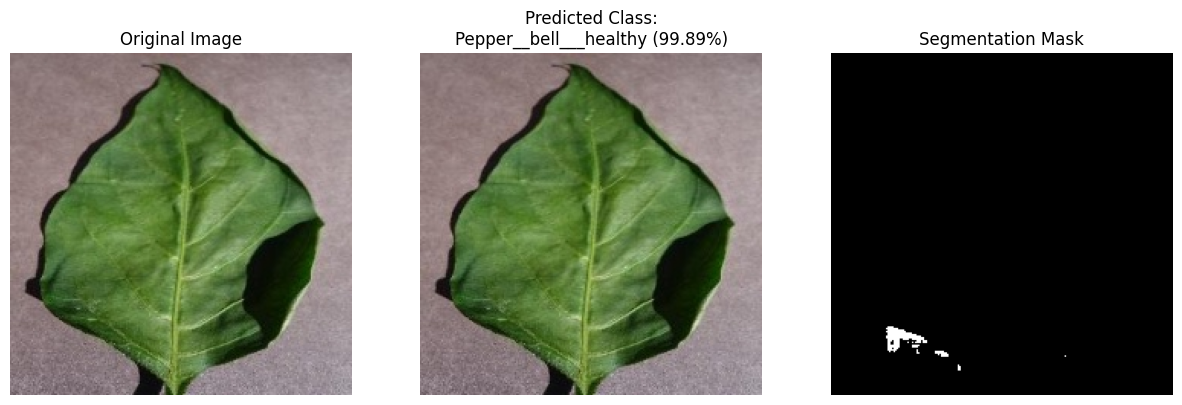

In [ ]:
image_3_path = '/content/test_image_23.jpg'
display_results(image_3_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


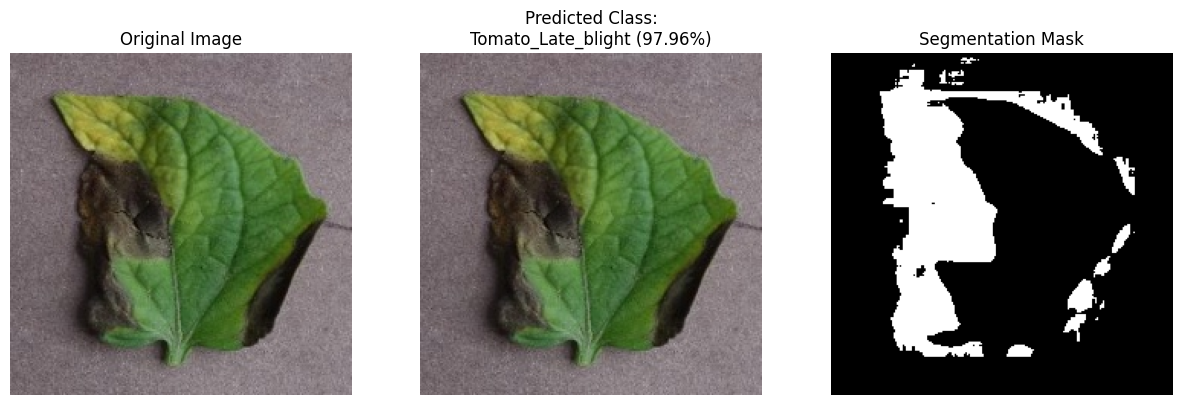

In [ ]:
image_4_path = '/content/test_image_15.jpg'
display_results(image_4_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


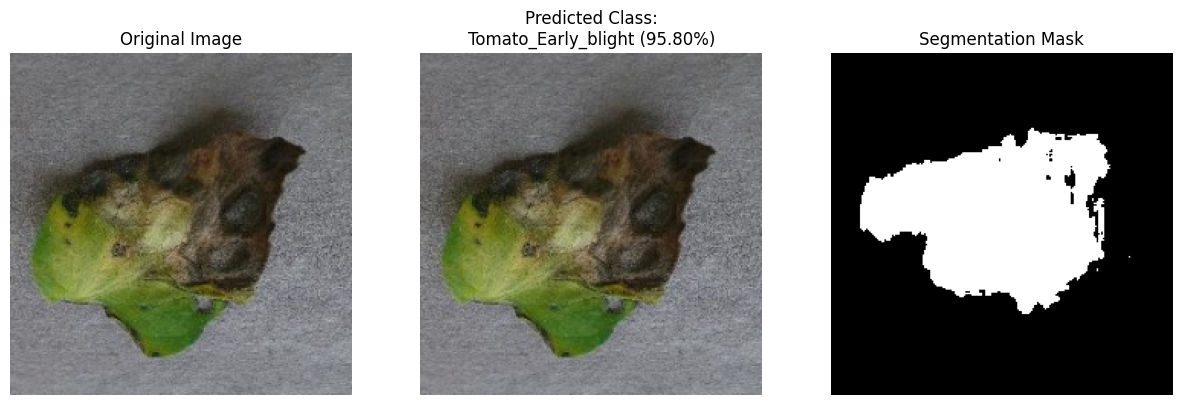

In [ ]:
image_5_path = '/content/test_image_4.jpg'
display_results(image_5_path)